In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import datasets
from keras.utils import np_utils

In [ ]:
#이 데이터는 아예 나눠져서 들어와있음
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3   0 

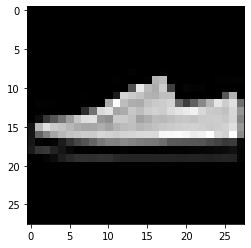

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray') #이 데이터는 이미지라서
plt.show
print(Y_train[my_sample]) #정답을 확인해보자
print(X_train[my_sample]) 

#데이터를 보면 곱하면 커짐, 그러면 scale을 해줘야함, 0-1사이면 곱해도 커지지 않음.

In [ ]:
y_train = np_utils.to_categorical(Y_train)  #onehotencoding을 해줌
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#reshape없이 이미지 그대로 들어가야함
x_train = X_train/255  #minmax scale   255니까 0-1로 만들어줌
x_test = X_test/255
x_train = x_train.reshape(60000, 28, 28, 1)  #가로세로 컬러
print(x_train.shape)  #784개의 픽셀이 들어있는 데이터프레임 6만개
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_test.shape)  #784개의 픽셀이 들어있는 데이터프레임 6만개
print(x_train[0])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=(28, 28, 1), padding='same',
                 activation='relu'))
#3,3 커널을 32개 만듦, 커널 안의 값은 랜덤 32개의 커널을 거쳐서 나오는 이미지는 32개
#padding='same' 입력이미지와 출력이미지가 같게
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
#2,2 필터상자에서 max값, 커널만큼 감 겹치지 않고, 빈칸이 더 없으면 끝 padding='same'을 주면 모자란 칸마큼 0으로채워줌
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='same',activation='relu'))
model.add(MaxPool2D(padding='same', pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  #카테고리가 10개
#kerner은 필터임. 커널사이즈가 커지면출력이미지가 작아짐

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
#학습시키기
fit_hist = model.fit(x_train, y_train, batch_size=128,
                     epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 44s 115ms/step - loss: 0.5541 - accuracy: 0.8031 - val_loss: 0.3837 - val_accuracy: 0.8644
Epoch 2/20
375/375 [==============================] - 44s 116ms/step - loss: 0.3440 - accuracy: 0.8761 - val_loss: 0.3527 - val_accuracy: 0.8703
Epoch 3/20
375/375 [==============================] - 44s 117ms/step - loss: 0.2953 - accuracy: 0.8938 - val_loss: 0.2897 - val_accuracy: 0.8947
Epoch 4/20
375/375 [==============================] - 44s 117ms/step - loss: 0.2714 - accuracy: 0.9014 - val_loss: 0.2960 - val_accuracy: 0.8908
Epoch 5/20
375/375 [==============================] - 44s 116ms/step - loss: 0.2484 - accuracy: 0.9092 - val_loss: 0.2570 - val_accuracy: 0.9057
Epoch 6/20
375/375 [==============================] - 44s 117ms/step - loss: 0.2300 - accuracy: 0.9170 - val_loss: 0.2436 - val_accuracy: 0.9105
Epoch 7/20
375/375 [==============================] - 44s 116ms/step - loss: 0.2133 - accuracy: 0.9215 - val_loss: 0.2466 - val_ac

In [ ]:
#검증하기
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy :', score[1])

Final test set accuracy : 0.9154000282287598


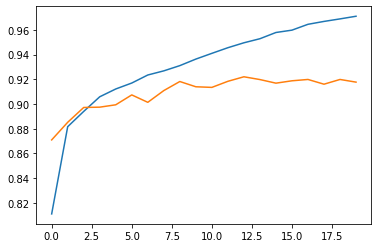

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()


2
pullover
[[5.73265561e-06 1.44709835e-08 1.44558549e-01 9.58237152e-08
  8.15756381e-01 1.13711673e-09 3.96789797e-02 2.30560389e-08
  1.84244470e-07 1.39263747e-07]]
coat


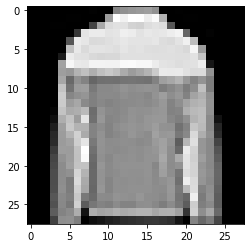

In [ ]:
my_sample = np.random.randint(10000) #테스트 안한곳에서 랜덤하게
plt.imshow(X_test[my_sample], cmap='gray')
print(Y_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28,28,1))
print(pred)
print(label[np.argmax(pred)])
